In [1]:
%cd ../

/home/zulqarnain/Code/temp/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_111'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

In [8]:
dtfa.num_blocks

96

In [9]:
dtfa.num_voxels

175987

In [10]:
dtfa.tasks()

['Social_a_2.m4v',
 'Heights_b_3.mov',
 'Spiders_a_3.m4v',
 'Heights_a_2.m4v',
 'Spiders_b_3.mov',
 'Social_b_1.mp4',
 'Social_b_3.mp4',
 'Spiders_b_1.m4v',
 'Heights_b_4.mp4',
 'Spiders_a_1.m4v',
 'Social_a_4.mp4',
 'Heights_b_1.mp4',
 'Spiders_b_4.m4v',
 'Social_a_1.mp4',
 'Spiders_b_2.mp4',
 'Social_a_3.mp4',
 'Spiders_a_2.mp4',
 'Heights_b_2.m4v',
 'Social_b_2.mov',
 'Heights_a_4.mp4',
 'Social_b_4.mov',
 'Spiders_a_4.mov',
 'Heights_a_3.mp4',
 'Heights_a_1.mp4']

In [11]:
dtfa.subjects()

[103, 107, 119, 149]

In [12]:
dtfa.load_state('data/sub-1CHECK_04042022_223211_Epoch1000')

In [13]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, predictive=True)

[[1355234560.0, -1355223680.0, 10754.1640625],
 [1383192192.0, -1326565120.0, 10807.1328125]]

In [14]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, ablate_subjects=True, predictive=True)

[[1340604672.0, -1340593792.0, 10757.73828125],
 [1365511808.0, -1315128448.0, 10843.6513671875]]

In [15]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, ablate_tasks=True, predictive=True)

[[1357544448.0, -1357533568.0, 10762.0322265625],
 [1386533888.0, -1332025856.0, 10872.123046875]]

In [16]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, custom_interaction=[0, 0.50], predictive=True)

[[1348948352.0, -1348937472.0, 10751.427734375],
 [1385293184.0, -1320861568.0, 10800.5625]]

In [17]:
validation_filter = affvids_db.inference_filter(training=False)
print( [b for (b, block) in dtfa._dataset.blocks.items() if validation_filter(block)])

[0, 32, 53, 77]


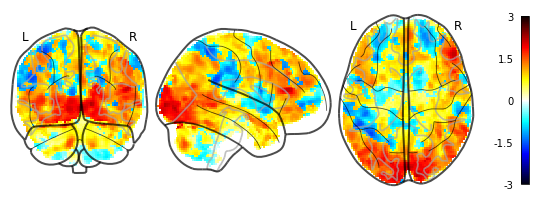

04/05/2022 15:41:44 Reconstruction Error (Frobenius Norm): 1.88368195e+02 out of 2.15893829e+02


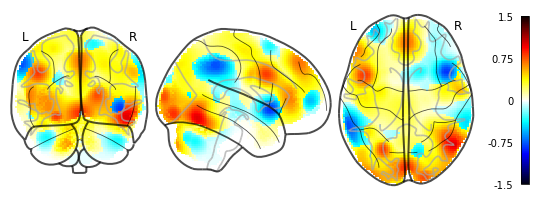

04/05/2022 15:41:48 Reconstruction Error (Frobenius Norm): 2.03928665e+02 out of 2.15893829e+02


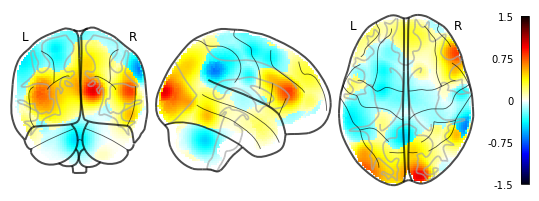

04/05/2022 15:41:52 Reconstruction Error (Frobenius Norm): 1.86221527e+02 out of 2.15893829e+02


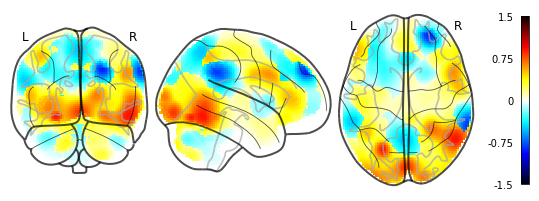

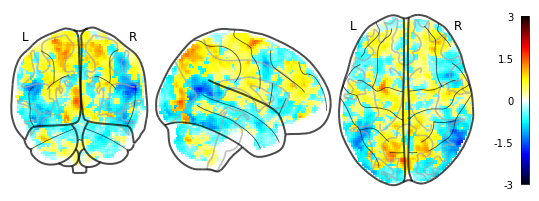

04/05/2022 15:42:13 Reconstruction Error (Frobenius Norm): 1.37979355e+02 out of 1.23998322e+02


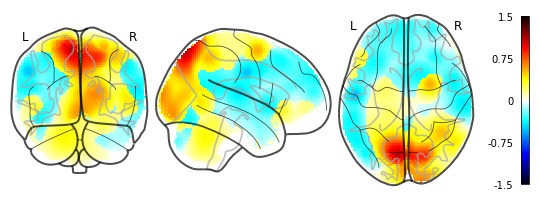

04/05/2022 15:42:24 Reconstruction Error (Frobenius Norm): 1.34325577e+02 out of 1.23998322e+02


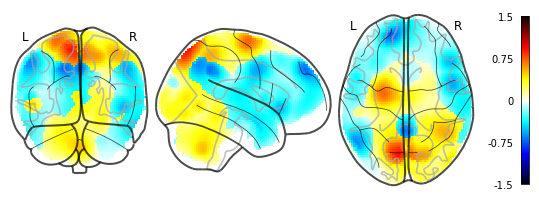

04/05/2022 15:42:35 Reconstruction Error (Frobenius Norm): 1.41727661e+02 out of 1.23998322e+02


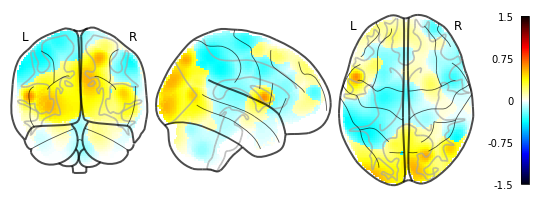

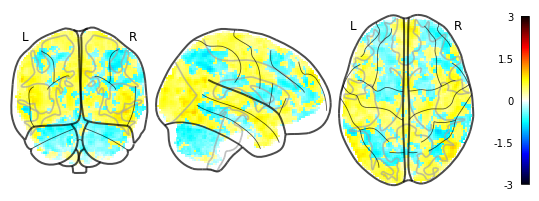

04/05/2022 15:43:05 Reconstruction Error (Frobenius Norm): 1.20560516e+02 out of 1.02755928e+02


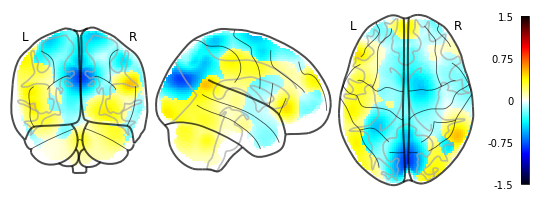

04/05/2022 15:43:21 Reconstruction Error (Frobenius Norm): 1.10585388e+02 out of 1.02755928e+02


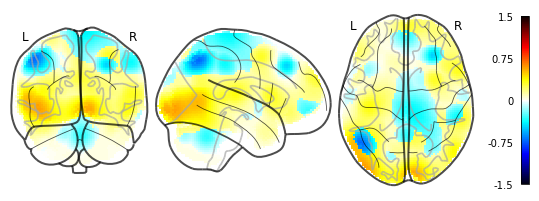

04/05/2022 15:43:39 Reconstruction Error (Frobenius Norm): 1.11848763e+02 out of 1.02755928e+02


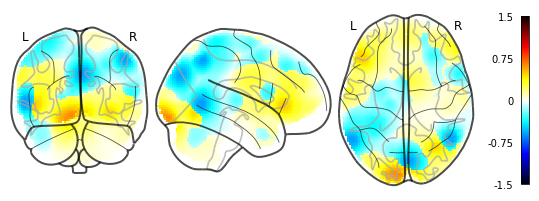

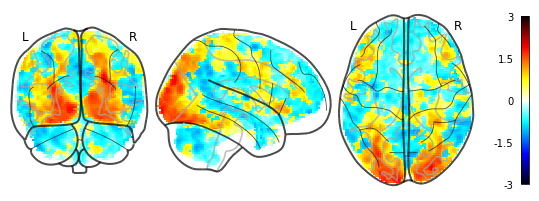

04/05/2022 15:44:22 Reconstruction Error (Frobenius Norm): 1.54049026e+02 out of 1.65454468e+02


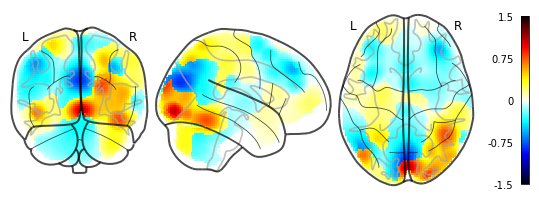

04/05/2022 15:44:43 Reconstruction Error (Frobenius Norm): 1.66545486e+02 out of 1.65454468e+02


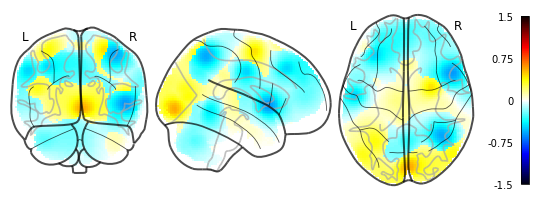

04/05/2022 15:45:03 Reconstruction Error (Frobenius Norm): 1.63836960e+02 out of 1.65454468e+02


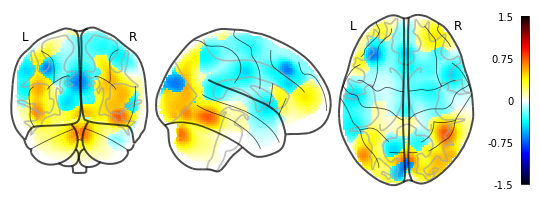

In [18]:
for b in [b for (b, block) in dtfa._dataset.blocks.items() if validation_filter(block)]:
    dtfa.plot_original_brain(b, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction(b, labeler=lambda b: None, t=None, zscore_bound=1.5)
    dtfa.plot_reconstruction(b, labeler=lambda b: None, t=None, ablate_subjects=True, zscore_bound=1.5)
    dtfa.plot_reconstruction(b, labeler=lambda b: None, t=None, ablate_tasks=True, zscore_bound=1.5)

In [19]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/temp/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


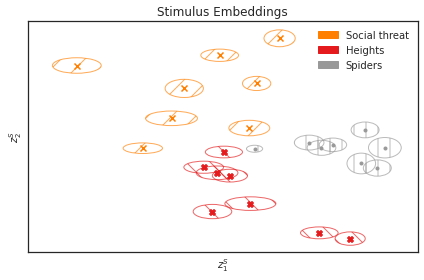

In [20]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [21]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/temp/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


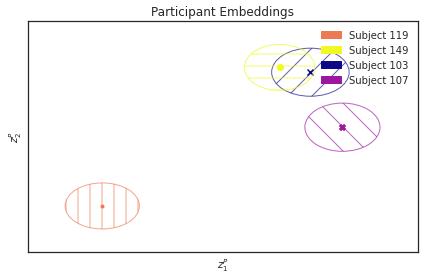

In [22]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

/home/zulqarnain/Code/temp/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


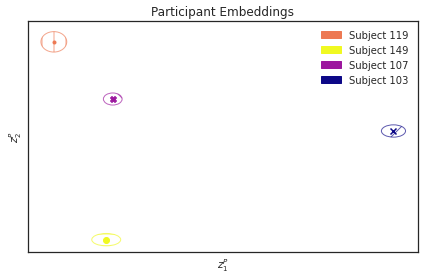

In [23]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')